In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DayLocator, HourLocator, MinuteLocator, DateFormatter
import pathlib

In [12]:
filename = 'ea4gpz_eclipse_festival_5000kHz_2021-11-30T22:00:01.019060_waterfall.npy'
waterfall = np.load(filename)
nfft = 8192
fs = 200
tstep = nfft / fs
maxfreq = 0.5 * waterfall.shape[1] * fs / nfft
t0 = np.datetime64(filename.split('_')[-2])
t = t0 + (1e9 * tstep) * (0.5 + np.arange(waterfall.shape[0])) * np.timedelta64(1, 'ns')
tsel = (t >= np.datetime64('2021-12-03T13:00')) & (t <= np.datetime64('2021-12-04T13:00'))

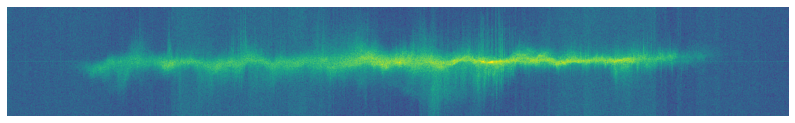

In [21]:
plt.figure(figsize=(14, 2), facecolor='w')
plt.imshow(10*np.log10(waterfall)[tsel, ::-1].T,
           aspect='auto',
           extent=[mdates.date2num(t[tsel][0]), mdates.date2num(t[tsel][-1]),
                   -maxfreq, maxfreq],
           vmin=-30, vmax=50)
plt.axis('off');

In [3]:
first_day = np.datetime64('2021-11-30')
last_day = np.datetime64('2021-12-11')
days = np.arange(first_day, last_day, np.timedelta64(1, 'D'))

In [4]:
eclipse_start = np.datetime64('2021-12-04T05:29:16')
eclipse_end = np.datetime64('2021-12-04T09:37:26')
eclipse_day = np.datetime64('2021-12-04')

In [5]:
def plot_waterfall(glob, title):
    fig, axs = plt.subplots(days.size, 1, figsize=(12, 15), facecolor='w', sharex=True)
    for filename in pathlib.Path('.').glob(glob):
        waterfall = np.load(filename)
        t0 = np.datetime64(filename.name.split('_')[-2])
        t = t0 + (1e9 * tstep) * (0.5 + np.arange(waterfall.shape[0])) * np.timedelta64(1, 'ns')
        for ax, day in zip(axs, days):
            before = np.where(t < day)[0]
            if before.size == t.size:
                continue
            a = before[-1] if before.size else 0
            after = np.where(t > day + np.timedelta64(1, 'D'))[0]
            if after.size == t.size:
                continue
            b = after[0] + 1 if after.size else None
            sel = slice(a, b)
            dn0 = mdates.date2num(day)
            ax.imshow(10*np.log10(waterfall[sel, ::-1].T),
                      aspect='auto',
                      extent=[mdates.date2num(t[sel][0]) - dn0, mdates.date2num(t[sel][-1]) - dn0,
                              -maxfreq, maxfreq],
                      vmin=-30, vmax=50)
    for day, ax in zip(days, axs):
        ax.axhline(y=0, color='white', linewidth=1, alpha=0.3)
        ax.set_xlim((0.0, 1.0))
        freq_ticks = np.arange(-4, 6, 2)
        ax.set_yticks(freq_ticks, [f'{t} Hz' for t in freq_ticks])
        ax.set_ylabel(day)
        ax.set_facecolor('grey')
        if day == eclipse_day:
            ed = mdates.date2num(eclipse_day)
            for d in (eclipse_start, eclipse_end):
                ax.axvline(x=mdates.date2num(d)-ed, color='white', linewidth=1)
    plt.subplots_adjust(hspace=0)
    axs[-1].xaxis.set_major_locator(HourLocator(interval=2))
    axs[-1].xaxis.set_major_formatter(DateFormatter('%H:%M'))
    axs[-1].set_xlabel('UTC time of day')
    axs[0].set_title(title)

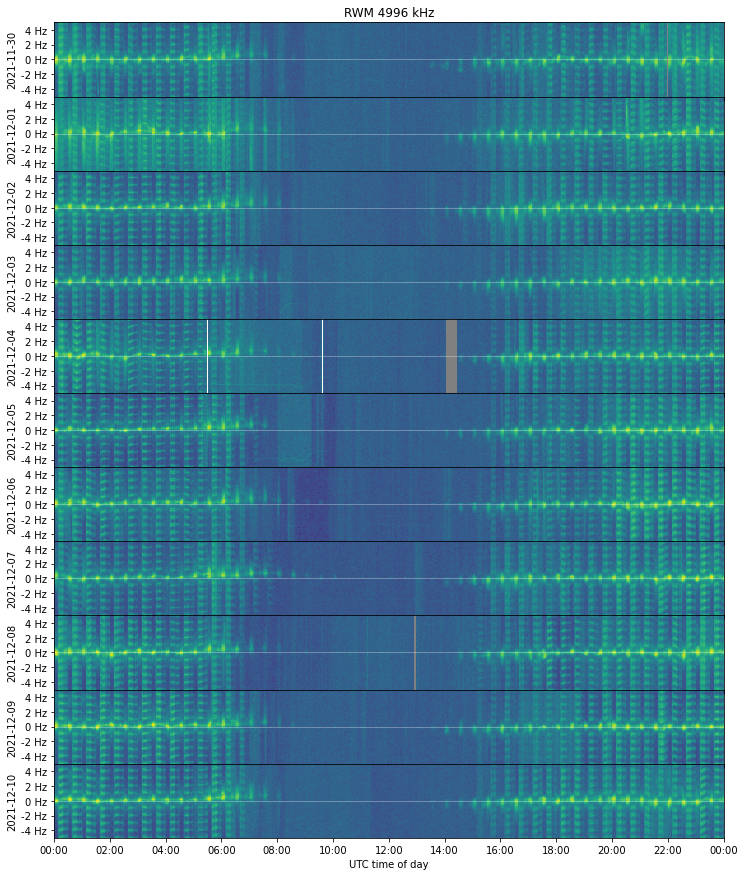

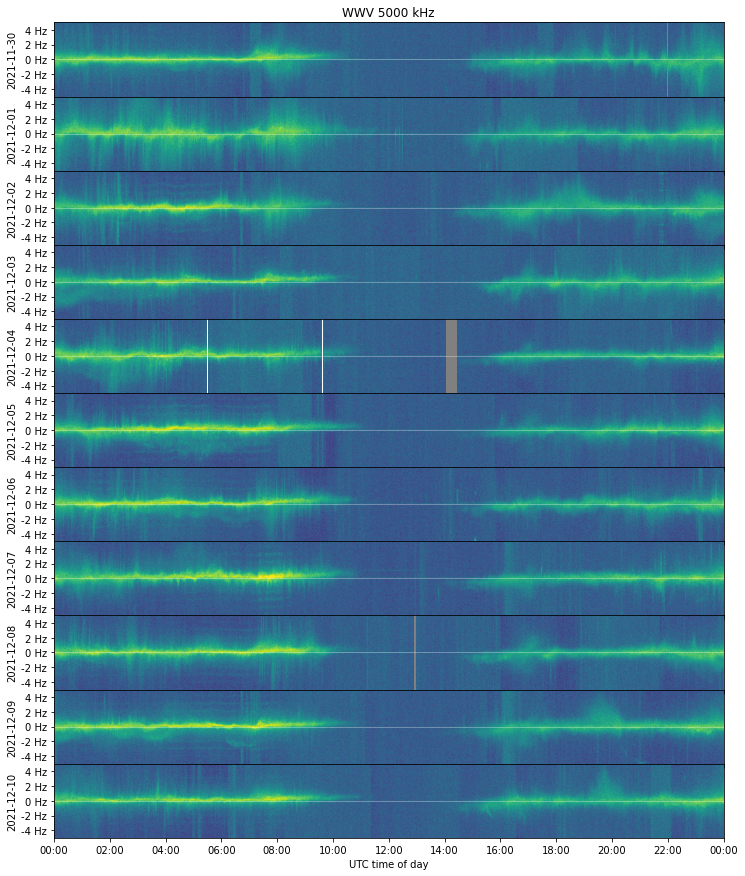

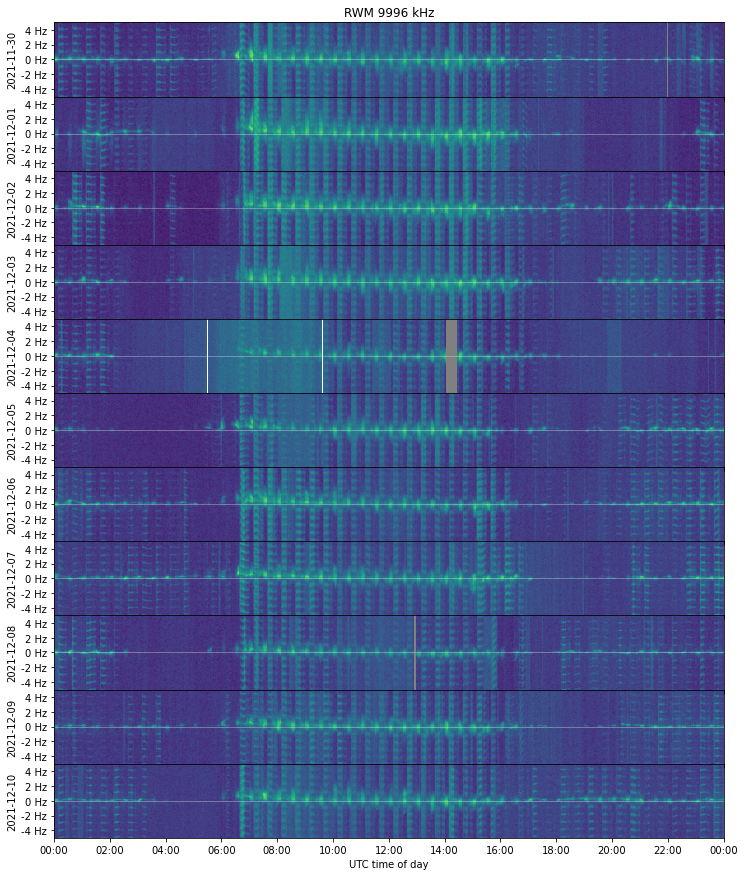

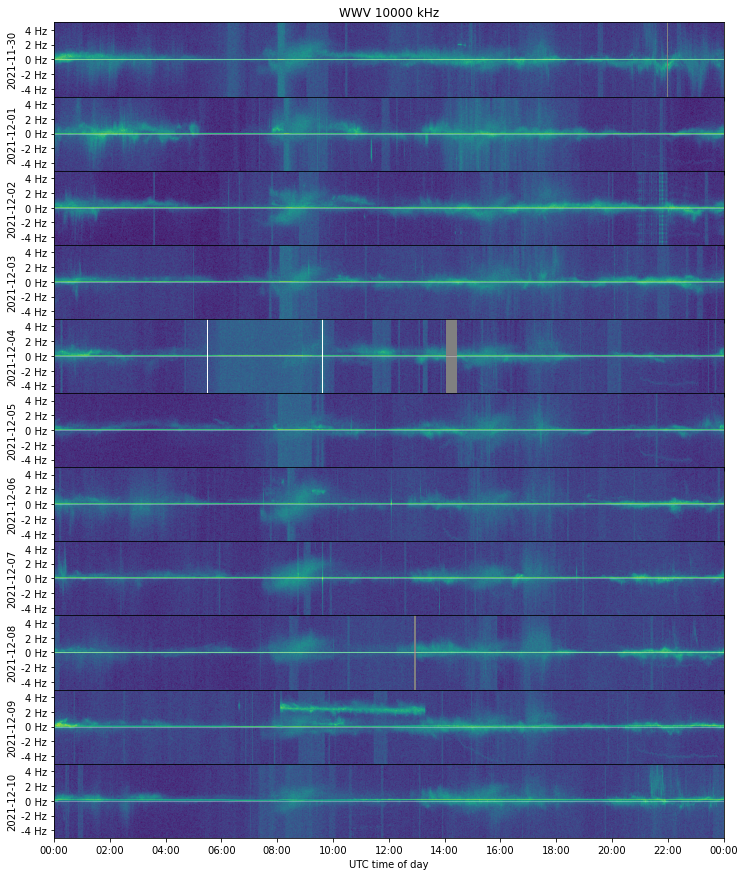

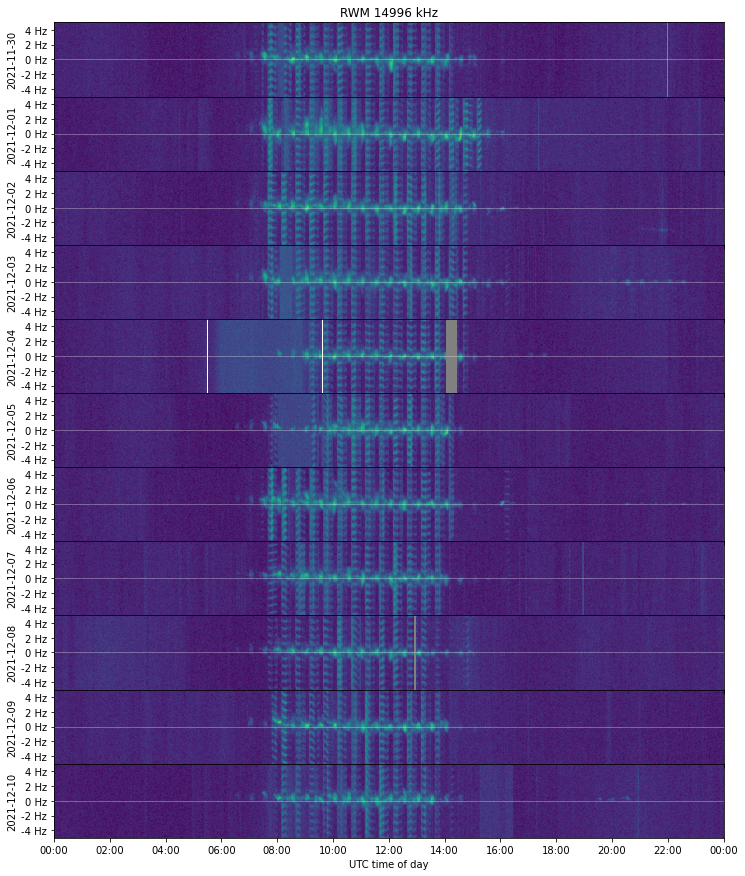

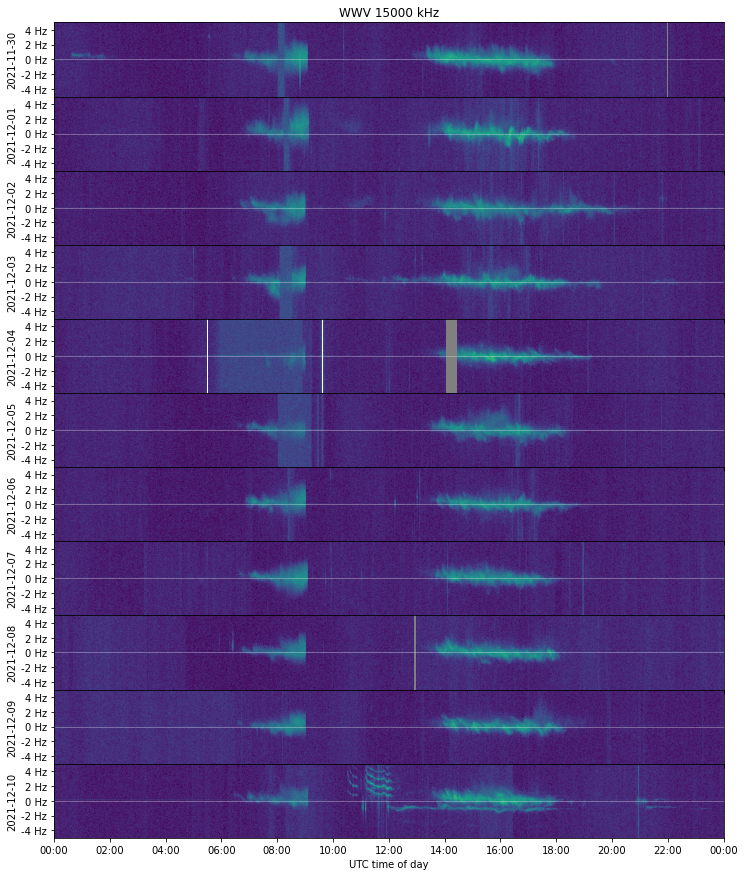

In [6]:
freqs = [4996, 5000, 9996, 10000, 14996, 15000]
globs = [f'ea4gpz_eclipse_festival_{f}kHz_*_waterfall.npy' for f in freqs]
titles = [f"{'WWV' if f % 1000 == 0 else 'RWM'} {f} kHz" for f in freqs]
for glob, title in zip(globs, titles):
    plot_waterfall(glob, title)